## We will proceed to test our paradigm of constant rate sampling on File 5 of Normal & Abnormal Data

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler

In [2]:
dirname = os.getcwd()
data = np.hstack((np.loadtxt(dirname+ '/NORMAL/File0/File0.bag.csv'), np.loadtxt(dirname+ '/NORMAL/File1/File1.bag.csv'),np.loadtxt(dirname+ '/NORMAL/File2/File2.bag.csv'),np.loadtxt(dirname+ '/NORMAL/File3/File3.bag.csv'),np.loadtxt(dirname+ '/NORMAL/File4/File4.bag.csv')))
data = data.T

## Checking how much Data is encapsulated in each PCA component

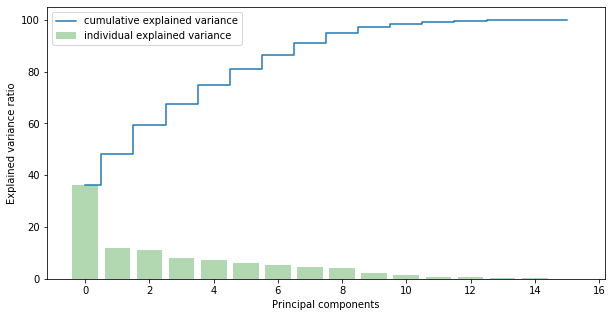

In [3]:
X_std = StandardScaler().fit_transform(data)
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0], reverse= True)
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show();

In [4]:
print(cum_var_exp[7]) #Explained Variance @ n_components = 8

90.935573656235


Here, till no. of components = 8, much of the data is encapsulated. So n_components = 8

In [5]:
pca = PCA(n_components=8)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

## Saving the PCA Module for later use

In [6]:
import pickle
filename = 'pca_transform.sav'
pickle.dump(pca, open(filename, 'wb'))